In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


'C:\Users\VANSHITA' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'tensorflow'

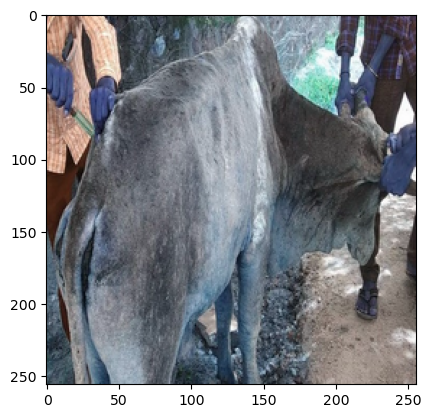

In [5]:
Train_DIR=r'.\Lumpy\training'
Categories=["Lumpy Skin","Normal Skin"]

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

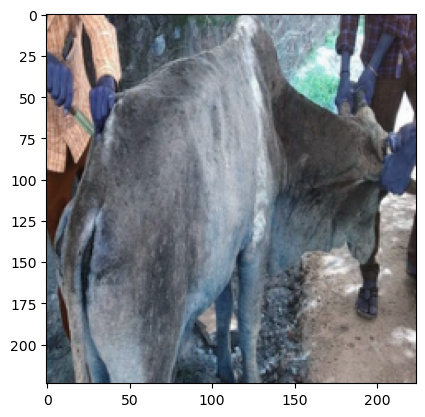

In [6]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [9]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'E:\Lumpy\training',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='binary',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'E:\Lumpy\validation',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='binary',
                                         subset='validation')

Found 820 images belonging to 2 classes.
Found 204 images belonging to 2 classes.


In [10]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 128)      

In [11]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=50,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16 )

Epoch 1/50
51/51 [==============================] - 50s 990ms/step - loss: 0.5874 - accuracy: 0.7139 - val_loss: 0.5280 - val_accuracy: 0.7188
Epoch 2/50
51/51 [==============================] - 47s 916ms/step - loss: 0.4674 - accuracy: 0.7774 - val_loss: 0.5047 - val_accuracy: 0.7760
Epoch 3/50
51/51 [==============================] - 47s 912ms/step - loss: 0.4723 - accuracy: 0.7923 - val_loss: 0.4949 - val_accuracy: 0.8125
Epoch 4/50
51/51 [==============================] - 46s 911ms/step - loss: 0.4446 - accuracy: 0.7823 - val_loss: 0.5118 - val_accuracy: 0.7917
Epoch 5/50
51/51 [==============================] - 47s 925ms/step - loss: 0.4549 - accuracy: 0.8122 - val_loss: 0.4284 - val_accuracy: 0.8490
Epoch 6/50
51/51 [==============================] - 48s 941ms/step - loss: 0.4279 - accuracy: 0.8122 - val_loss: 0.5304 - val_accuracy: 0.7500
Epoch 7/50
51/51 [==============================] - 47s 927ms/step - loss: 0.4508 - accuracy: 0.8010 - val_loss: 0.4460 - val_accuracy: 0.8073

In [12]:
val_datagen.class_indices

{'Lumpy Skin': 0, 'Normal Skin': 1}

In [13]:
filename="model32.h5"
model.save(filename)

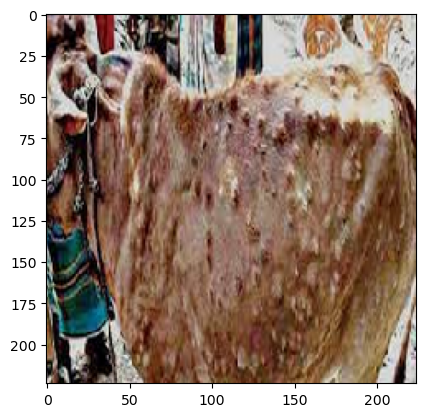

Lumpy Skin


In [14]:
from tensorflow.keras.models import load_model
from PIL import Image

loaded_model=load_model("model32.h5")


img=image.load_img(r'E:\Lumpy\testing\Lumpy Skin\Lumpy_Skin_52.png',target_size=(IMG_SIZE,IMG_SIZE))
plt.imshow(img)
plt.show()
    
X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
val=loaded_model.predict(images)
if val==0:
    print("Lumpy Skin") 
else:
    print("Normal Skin")

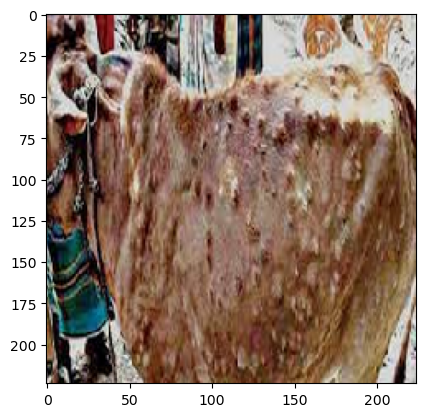

[[0.]]


In [7]:
from tensorflow.keras.models import load_model
from PIL import Image

loaded_model=load_model("model32.h5")


img=image.load_img(r'E:\Lumpy\testing\Lumpy Skin\Lumpy_Skin_52.png',target_size=(IMG_SIZE,IMG_SIZE))
plt.imshow(img)
plt.show()
    
X=image.img_to_array(img)
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
val=loaded_model.predict(images)
print(val)

In [2]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,51)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

NameError: name 'model_history' is not defined